<a href="https://colab.research.google.com/github/pvanik1/FastAI/blob/master/Lesson_1_Homework_Number_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Based on course notes from Lesson 1: https://github.com/hiromis/notes/blob/master/Lesson1.md**

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *
from fastai.metrics import error_rate

Updating fastai...
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
Done.


In [0]:
bs = 64

In [4]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

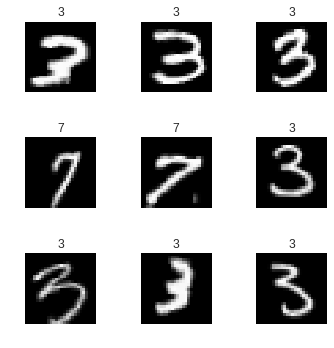

In [6]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)
data.show_batch(rows=3, figsize=(5,5))

In [7]:
learn = create_cnn (data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 91631001.56it/s]


epoch,train_loss,valid_loss,error_rate
1,0.200710,0.093980,0.030422
2,0.103537,0.041674,0.014720
3,0.071877,0.021604,0.007851
4,0.059146,0.021896,0.009323


In [0]:
learn.save('stage-1')

[('3', '7', 13), ('7', '3', 6)]

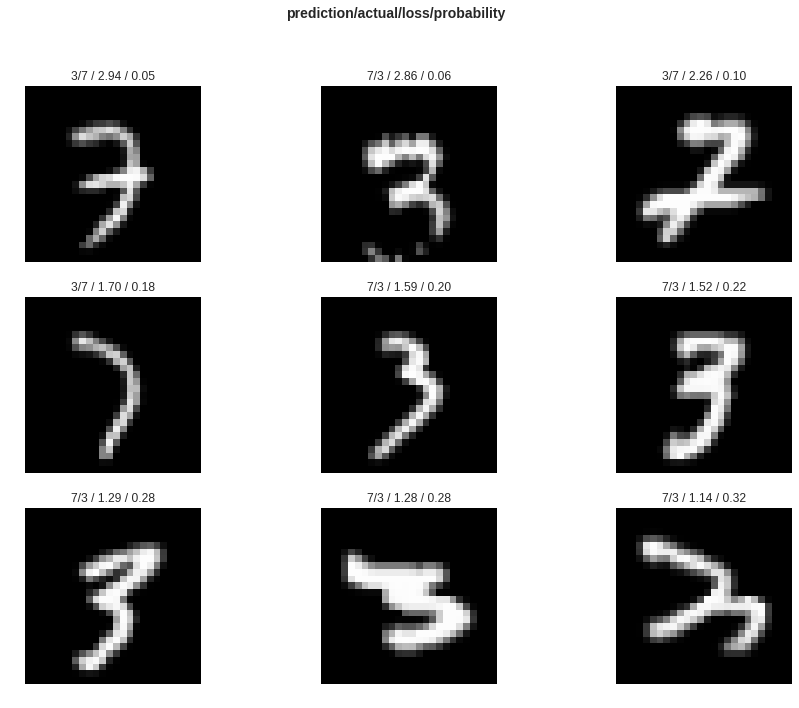

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))
# interp.most_confused(min_val = 2)

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


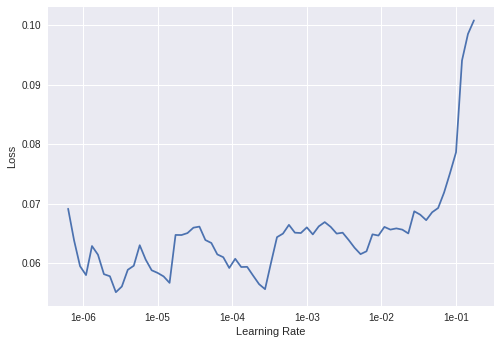

In [15]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-02))

epoch,train_loss,valid_loss,error_rate
1,0.058091,0.006883,0.001472
2,0.016825,0.004712,0.001472


In [0]:
learn.save('stage-2')